# Passive degrees of freedom



Passive dofs!

In [1]:
from blop.utils import prepare_re_env

%run -i $prepare_re_env.__file__ --db-type=temp

running iteration 1 / 1


Transient Scan ID: 1     Time: 2024-01-30 23:39:10
Persistent Unique Scan ID: 'e54df2e6-3c25-4576-9160-4176efb9966e'
New stream: 'primary'
+-----------+------------+------------+------------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |  brownian2 |         x3 |  brownian1 |
+-----------+------------+------------+------------+------------+------------+------------+
|         1 | 23:39:10.1 |      0.022 |     -0.021 |     -0.030 |      0.000 |     -0.009 |


|         2 | 23:39:10.6 |     -0.041 |      0.601 |      0.300 |      0.000 |     -0.023 |


|         3 | 23:39:11.0 |      0.638 |      1.479 |     -0.029 |      0.000 |      0.141 |


|         4 | 23:39:11.5 |      3.586 |      1.156 |      0.332 |      0.000 |      0.111 |


|         5 | 23:39:11.9 |      4.155 |      3.068 |      0.240 |      0.000 |     -0.044 |


|         6 | 23:39:12.4 |      1.319 |      4.640 |      0.272 |      0.000 |      0.231 |


|         7 | 23:39:12.8 |     -1.898 |      3.612 |      0.174 |      0.000 |      0.143 |


|         8 | 23:39:13.2 |     -4.806 |      3.914 |     -0.006 |      0.000 |      0.198 |


|         9 | 23:39:13.7 |     -2.914 |      2.155 |     -0.222 |      0.000 |      0.741 |


|        10 | 23:39:14.1 |     -3.527 |     -0.722 |     -0.418 |      0.000 |      0.707 |


|        11 | 23:39:14.5 |     -4.213 |     -2.555 |     -0.889 |      0.000 |      0.557 |


|        12 | 23:39:14.9 |     -1.261 |     -4.734 |     -0.699 |      0.000 |      0.569 |


|        13 | 23:39:15.4 |     -0.697 |     -1.649 |     -1.041 |      0.000 |      0.568 |


|        14 | 23:39:15.8 |      1.919 |     -3.265 |     -0.944 |      0.000 |      0.592 |


|        15 | 23:39:16.2 |      2.932 |     -2.217 |     -1.099 |      0.000 |      0.454 |


|        16 | 23:39:16.6 |      4.785 |     -4.213 |     -0.942 |      0.000 |      0.534 |


+-----------+------------+------------+------------+------------+------------+------------+
generator list_scan ['e54df2e6'] (scan num: 1)


/usr/share/miniconda3/envs/blop-py3.10/lib/python3.10/site-packages/bluesky/callbacks/fitting.py:167: RuntimeWarning: invalid value encountered in scalar divide
  np.sum(input * grids[dir].astype(float), labels, index) / normalizer


trained model 'himmelblau' in 206 ms


('e54df2e6-3c25-4576-9160-4176efb9966e',)

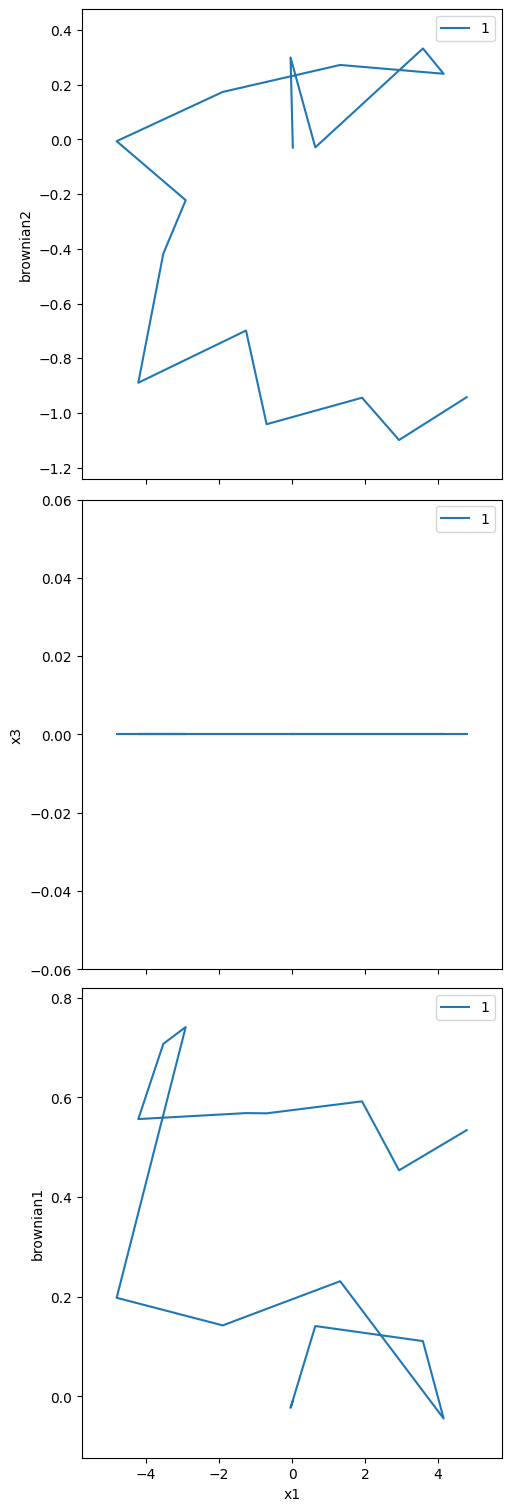

In [2]:
from blop.utils import functions
from blop import DOF, Agent, Objective
from blop.dofs import BrownianMotion


dofs = [
    DOF(name="x1", search_bounds=(-5.0, 5.0)),
    DOF(name="x2", search_bounds=(-5.0, 5.0)),
    DOF(name="x3", search_bounds=(-5.0, 5.0), active=False),
    DOF(device=BrownianMotion(name="brownian1"), read_only=True),
    DOF(device=BrownianMotion(name="brownian2"), read_only=True, active=False),
]

objectives = [
    Objective(name="himmelblau", target="min"),
]

agent = Agent(
    dofs=dofs,
    objectives=objectives,
    digestion=functions.constrained_himmelblau_digestion,
    db=db,
    verbose=True,
    tolerate_acquisition_errors=False,
)

RE(agent.learn("qr", n=16))

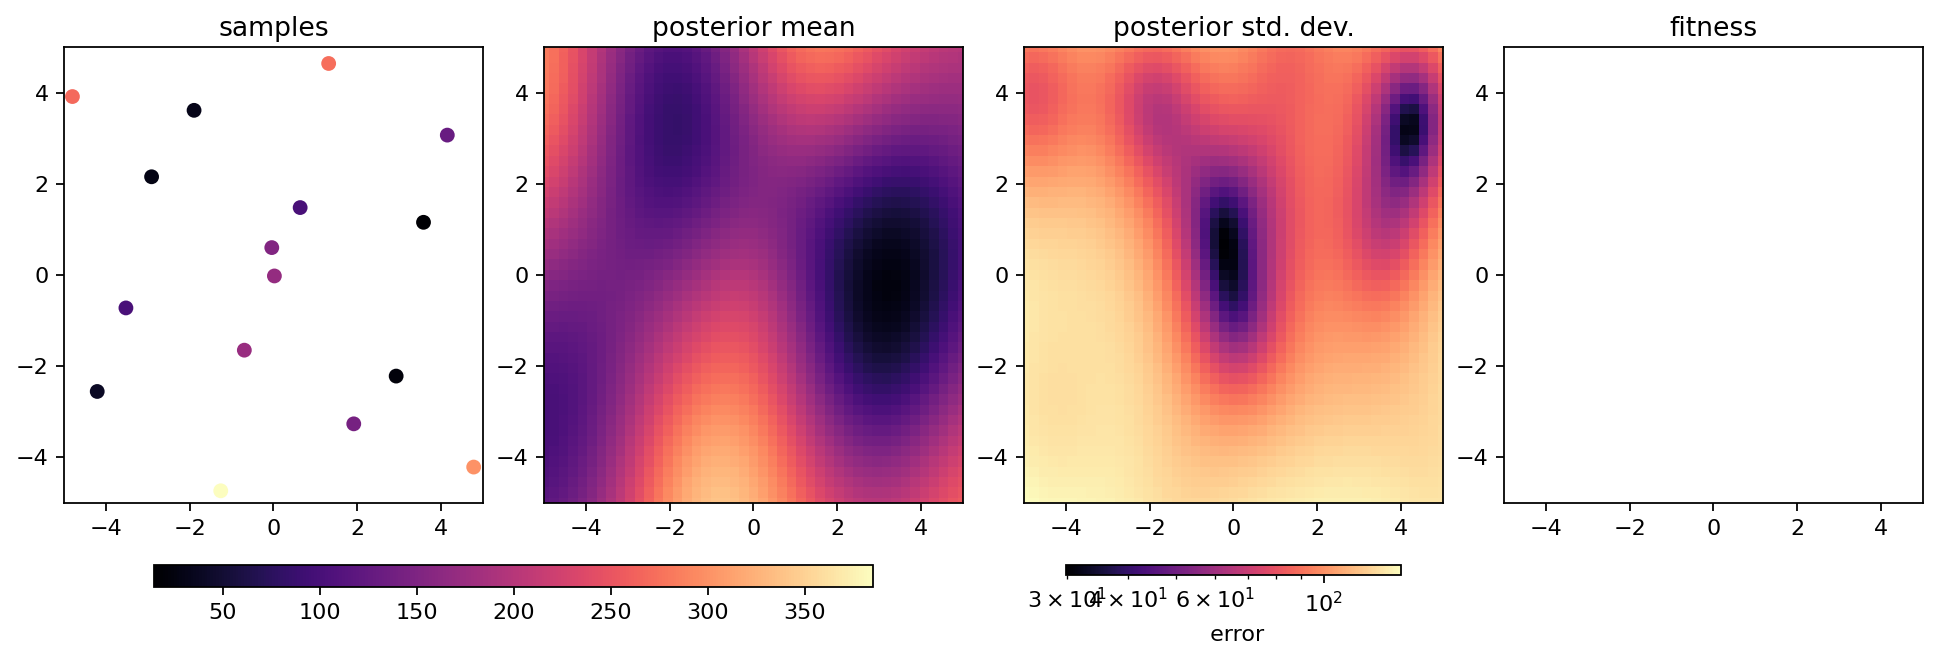

In [3]:
agent.plot_objectives()